**FEATURE ENGINEERING**
- Creating new features and  or transforming existing features to exhaust all that your data can offer.
- Popular transformations include
    - Power Transformations (square, square root)
    - Standardizing  

*Feature creation*

In [51]:
from pathlib import Path
import pandas as pd
import os

#read the dataset into the python
dataset = pd.read_csv(os.getcwd()+'\\Ex_Files_NLP_Python_ML_EssT\\Exercise Files\\Ch01\\01_03\\Start\\SMSSpamCollection.tsv', header=None, sep='\t')
dataset.columns = ['label', 'body_text']
dataset.sample(5)

,label,body_text
5244,ham,U come n search tat vid..not finishd..
4248,ham,Omg Joanna is freaking me out. She's looked th...
956,ham,Where @
5509,ham,Yes. Please leave at &lt;#&gt; . So that at ...
1506,ham,When u love someone Dont make them to love u a...


Create feature for text message length

In [52]:
dataset['body_len'] = dataset['body_text'].apply(lambda x: len(x) - x.count(" "))
dataset.head()

,label,body_text,body_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


Create feature for % of punctuation

In [65]:
import string

def count_punctuation(text):
    punct_ct = [char for char in text if char in string.punctuation]
    punct_pt = round((len(punct_ct)/(len(text) - text.count(' '))), 3)*100
    return punct_pt

dataset['punct_percent'] = dataset['body_text'].apply(lambda x: count_punctuation(x))
dataset.head()

,label,body_text,body_len,punct_percent
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


Evaluate created features using overlay histograms

In [66]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

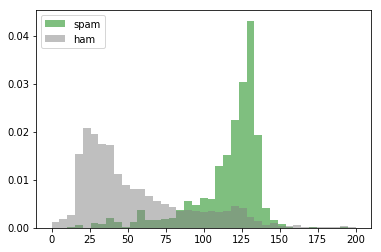

In [74]:
bins = np.linspace(0, 200, 40)
plt.hist(dataset[dataset['label'] == 'spam']['body_len'],bins, color='green', alpha=0.5, normed=True, label='spam')
plt.hist(dataset[dataset['label'] == 'ham']['body_len'], bins, color='grey', alpha=0.5, normed=True, label='ham')
plt.legend(loc='upper left')
plt.show()

*Generally, we can observe that the length of spam-labeled text appears to be longer, than ham labeled text* 

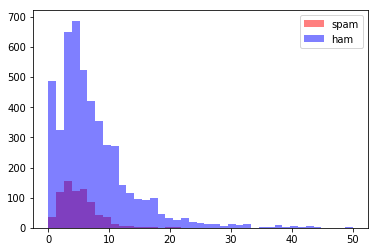

In [80]:
bins = np.linspace(0, 50, 40)
plt.hist(dataset[dataset['label'] == 'spam']['punct_percent'], bins=bins, alpha=0.5, color='red', label='spam')
plt.hist(dataset[dataset['label'] == 'ham']['punct_percent'], bins=bins, alpha=0.5, color='blue', label='ham')
plt.legend(loc='upper right')
plt.show()

*Clearly, ham messages appear to contain alot more punctuation than spam, which doesn't really help us*

Tranformations

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

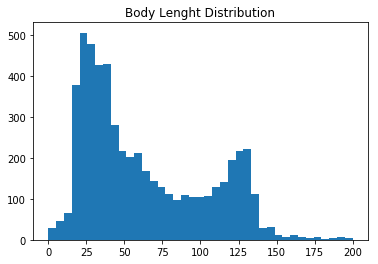

In [22]:
bins = np.linspace(0, 200, 40)
plt.hist(dataset['body_len'], bins)
plt.title('Body Lenght Distribution')
plt.show()

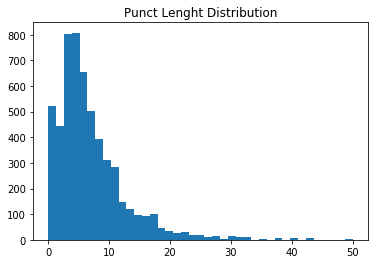

In [24]:
bins = np.linspace(0, 50, 40)
plt.hist(dataset['punct_len'], bins)
plt.title('Punct Lenght Distribution')
plt.show()

*The first plot for body length doesn't exhibt alot of skewness compared to the punct len which has most of the data concentrated to the left and a tail on the right*

TRANSFORMATION

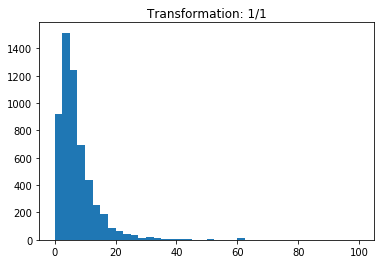

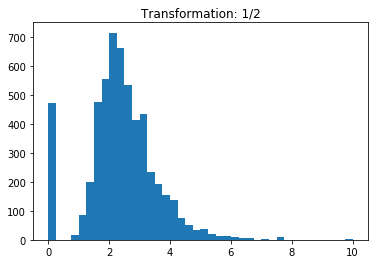

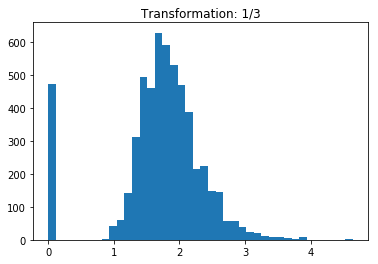

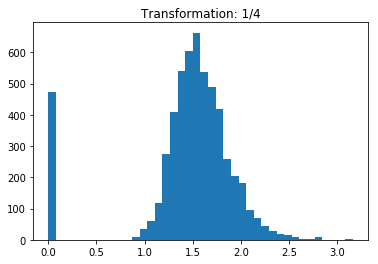

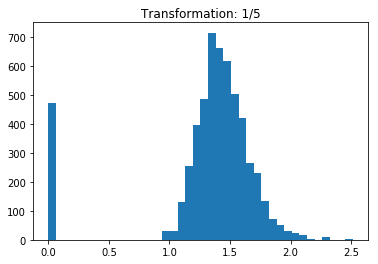

In [86]:
for i in [1,2,3,4,5]:
    plt.hist((dataset['punct_percent'])**(1/i), bins=40)
    plt.title('Transformation: 1/{}'.format(str(i)))
    plt.show()

The (1/1), (1/2) and (1/3) don't appear to achieve a normal distribution, on the other hand (1/4) and (1/5) succesfully transform the data to fit normal gaussian scale with mean 0 and standard deviation 1 